In [744]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

Medical_Cost_Data = pd.read_csv('insurance.csv')
Medical_Cost_Data.head()
categorical_columns = ['sex', 'children', 'smoker', 'region']
df_encode = pd.get_dummies(data=Medical_Cost_Data, prefix='', prefix_sep='',
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')

x = df_encode.drop('charges', axis=1)
y = df_encode['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.252)

df_encode.head(1500)



,age,bmi,charges,male,1,2,3,4,5,yes,northwest,southeast,southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,0,0,0,0,0,1


In [725]:
#Linear Regression
Classifier = LinearRegression()
Classifier.fit(x_train, y_train)
R2_Score = Classifier.score(x_test, y_test)

print('Using linear regression model:')
print("R2 Score: {0}".format(R2_Score.round(4)))
print('The Root Mean Square Error is:', round(sqrt(mean_squared_error(y_test, Classifier.predict(x_test))), 3))
print('The Mean Absolute Error on the testing dataset is:', mean_absolute_error(y_test, Classifier.predict(x_test)).round(3))


# intercept with y axis ... surely no intercept will limit
# the plot of the model line and limit the possibilities to
# get a line that may fit well with the data
# ... so lower accuracy (in this case

Classifier = LinearRegression(fit_intercept=False)
Classifier.fit(x_train, y_train)
R2_Score = Classifier.score(x_test, y_test)

print('\nUsing linear regression model (with no intercept):')
print("R2 Score: {0}".format(R2_Score.round(4)))
print('The Root Mean Square Error is:', round(sqrt(mean_squared_error(y_test, Classifier.predict(x_test))), 3))
print('The Mean Absolute Error on the testing dataset is:', mean_absolute_error(y_test, Classifier.predict(x_test)).round(3))

print('\nThere is no much we can do in linear regression in tuning\n,but intercept and in'
      ' this case it is best to be set to true')

Using linear regression model:
R2 Score: 0.7648
The Root Mean Square Error is: 6264.077
The Mean Absolute Error on the testing dataset is: 4331.687

Using linear regression model (with no intercept):
R2 Score: 0.7359
The Root Mean Square Error is: 6637.352
The Mean Absolute Error on the testing dataset is: 4590.846

There is no much we can do in linear regression in tuning
,but intercept and in this case it is best to be set to true


In [726]:
from sklearn.model_selection import GridSearchCV

#Gradient Boosting Regressor

Classifier = GradientBoostingRegressor()
Classifier.fit(x_train, y_train)
R2_Score = Classifier.score(x_test, y_test)

print('Using Gradient Boosting Regressor model:')
print("R2 Score: {0}".format(R2_Score.round(4)))
print('The Root Mean Square Error is:', round(sqrt(mean_squared_error(y_test, Classifier.predict(x_test))), 3))
print('The Mean Absolute Error on the testing dataset is:', mean_absolute_error(y_test, Classifier.predict(x_test)).round(3))

# we can tune both n_estimator and learning rate and max_depth
# best tune found for now is:

Classifier = GradientBoostingRegressor(learning_rate=.1,n_estimators=100,max_depth=2)
Classifier.fit(x_train, y_train)
R2_Score = Classifier.score(x_test, y_test)

#the best tuning with these two is the default (100 samples with 0.1 learning rate,max_depth=2)

print('\nUsing Gradient Boosting Regressor model(tuned):')
print("R2 Score: {0}".format(R2_Score.round(4)))
print('The Root Mean Square Error is:', round(sqrt(mean_squared_error(y_test, Classifier.predict(x_test))), 3))
print('The Mean Absolute Error on the testing dataset is:', mean_absolute_error(y_test, Classifier.predict(x_test)).round(3))

Using Gradient Boosting Regressor model:
R2 Score: 0.8472
The Root Mean Square Error is: 5048.547
The Mean Absolute Error on the testing dataset is: 2719.371

Using Gradient Boosting Regressor model(tuned):
R2 Score: 0.8524
The Root Mean Square Error is: 4962.957
The Mean Absolute Error on the testing dataset is: 2793.545


In [727]:
# Decision Tree Regressor
Classifier = DecisionTreeRegressor()
Classifier.fit(x_train, y_train)
R2_Score = Classifier.score(x_test, y_test)

print('Using Decision Tree Regressor model:')
print("R2 Score: {0}".format(R2_Score.round(4)))
print('The Root Mean Square Error is:', round(sqrt(mean_squared_error(y_test, Classifier.predict(x_test))), 3))
print('The Mean Absolute Error on the testing dataset is:', mean_absolute_error(y_test, Classifier.predict(x_test)).round(3))

#only using max depth of 3 has increased the r2 score more than .2 point which is great

Classifier = DecisionTreeRegressor(max_depth=3)
Classifier.fit(x_train, y_train)
R2_Score = Classifier.score(x_test, y_test)

print('\nUsing Decision Tree Regressor model:(tuned)')
print("R2 Score: {0}".format(R2_Score.round(4)))
print('The Root Mean Square Error is:', round(sqrt(mean_squared_error(y_test, Classifier.predict(x_test))), 3))
print('The Mean Absolute Error on the testing dataset is:', mean_absolute_error(y_test, Classifier.predict(x_test)).round(3))






Using Decision Tree Regressor model:
R2 Score: 0.6973
The Root Mean Square Error is: 7106.584
The Mean Absolute Error on the testing dataset is: 3632.552

Using Decision Tree Regressor model:(tuned)
R2 Score: 0.8308
The Root Mean Square Error is: 5313.196
The Mean Absolute Error on the testing dataset is: 3204.116


'\nReading the code below, we do this calculation in three steps to make it easier to understand.\ng is the sum of the differences between the observed values and the predicted ones. (ytest[i] – preds[i]) **2.\ny is each observed value y[i] minus the average of observed values np.mean(ytest).\nAnd then the results are printed thus:\n\nprint ("total sum of squares", y)\nprint ("total sum of residuals ", g)\nprint ("r2 calculated", 1 - (g / y))\n\n'

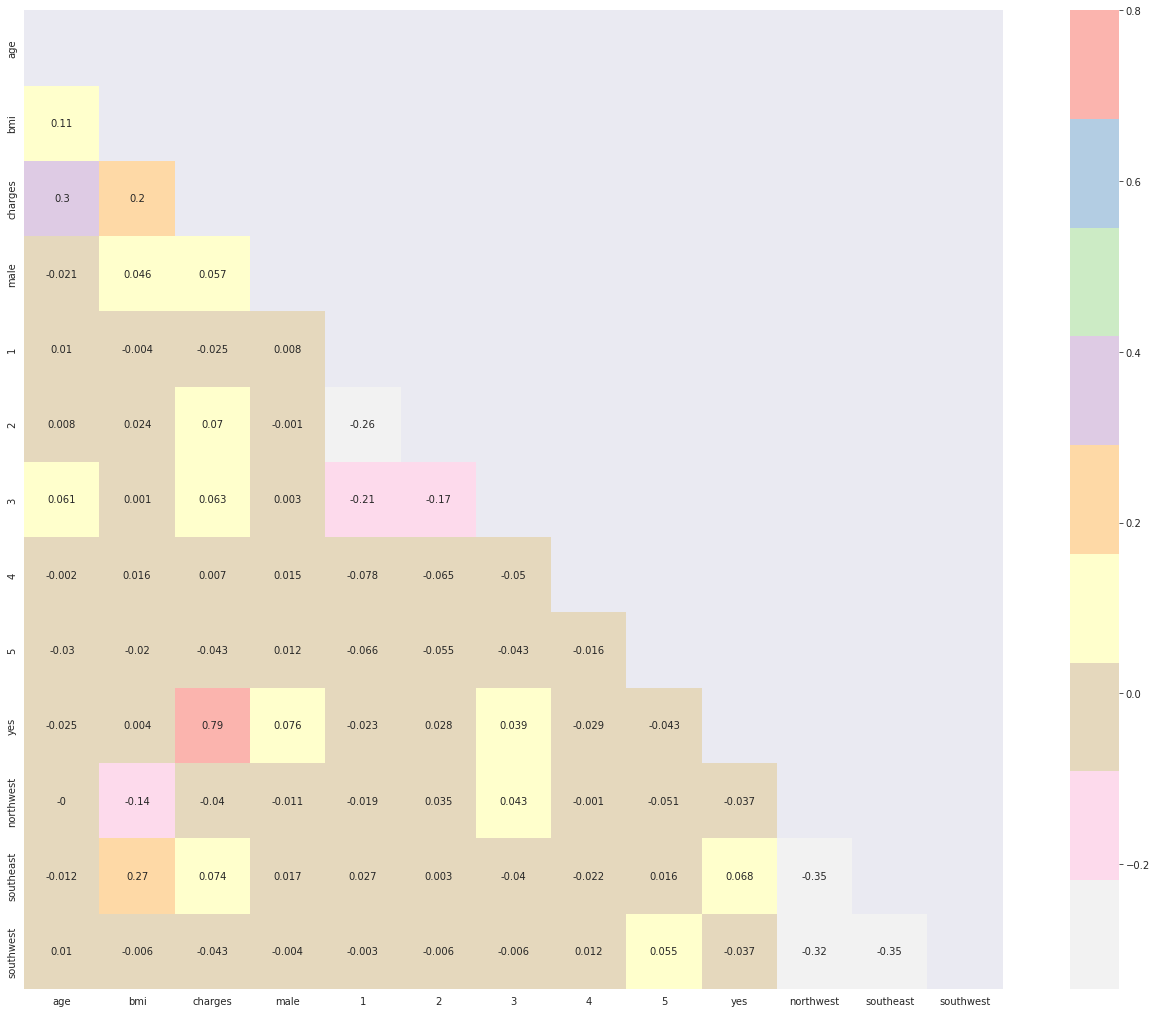

In [746]:
import seaborn as sns
# correlation plot
corr = df_encode.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):
    f, ax = plt.subplots(figsize=(24, 18))
    ax = sns.heatmap(round(corr, 3), mask=mask, vmax=.8, square=True, annot=True, cmap= "Pastel1_r")

'''
Reading the code below, we do this calculation in three steps to make it easier to understand.
g is the sum of the differences between the observed values and the predicted ones. (ytest[i] – preds[i]) **2.
y is each observed value y[i] minus the average of observed values np.mean(ytest).
And then the results are printed thus:

print ("total sum of squares", y)
print ("total sum of residuals ", g)
print ("r2 calculated", 1 - (g / y))

'''

